In [1]:
from download_dataset import download

download()

../data/notMNIST_small.tar.gz
File already exists.


In [2]:
im_root = '../data/notMNIST_small'

In [3]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np

In [4]:
classes_statistic = {}

for class_dir in os.listdir(im_root):
    class_path = os.path.join(im_root, class_dir)
    classes_statistic[class_dir] = len([name for name in os.listdir(class_path)])
    
total_count = sum(classes_statistic.values())

In [5]:
import cv2
from tqdm import tqdm

from config import image_size, pixel_depth
from config import train_percentage, test_percentage

In [6]:
train_size = int(total_count * train_percentage)
test_size = int(total_count * test_percentage)

In [7]:
X = []
y = []

In [8]:
dirs = os.listdir(im_root)

label_dict = {}

counter = 0

for id_class, dir_class in enumerate(dirs):
    label_dict[id_class] = dir_class
    for image in tqdm(os.listdir(os.path.join(im_root, dir_class))):
        try:
            X.append(plt.imread(os.path.join(im_root, dir_class, image)).reshape(-1, image_size * image_size)[0])
#             l = [0] * 10
#             l[id_class]=1
#             y.append(l)
            y.append(id_class)
            counter += 1
        except:
            continue

100%|██████████| 1873/1873 [00:00<00:00, 3266.27it/s]


In [9]:
len(X)

18724

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [11]:
x = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [12]:
# hyperparameters
input_size = 784
output_size = 10
hidden_sizes = [1000, 2000, 1000, 500]

epochs = 30
batch_size = 256
learning_rate = 0.0001

In [13]:
class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_sizes[0])
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        self.relu = nn.ReLU()
        self.l4 = nn.Linear(hidden_sizes[2], hidden_sizes[3])
        self.relu = nn.ReLU()
        self.l5 = nn.Linear(hidden_sizes[3], output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        x = self.relu(x)
        x = self.l3(x)
        x = self.relu(x)
        x = self.l4(x)
        x = self.relu(x)
        x = self.l5(x)
        return F.log_softmax(x)

In [14]:
net = Network()
print(net)

Network(
  (l1): Linear(in_features=784, out_features=1000, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=1000, out_features=2000, bias=True)
  (l3): Linear(in_features=2000, out_features=1000, bias=True)
  (l4): Linear(in_features=1000, out_features=500, bias=True)
  (l5): Linear(in_features=500, out_features=10, bias=True)
)


In [15]:
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
loss_func = nn.CrossEntropyLoss()

In [16]:
x.shape

torch.Size([18724, 784])

In [17]:
loss_log = []

for e in range(epochs):
    for i in range(0, x.shape[0]-batch_size, batch_size):

        x_mini = x[i:i + batch_size] 
        y_mini = y[i:i + batch_size] 
        
        x_var = Variable(x_mini)
        y_var = Variable(y_mini)
        
        optimizer.zero_grad()
        net_out = net(x_var)
        
        loss = loss_func(net_out, y_var)
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            loss_log.append(loss.data)
        
    print('Epoch: {} - Loss: {:.6f}'.format(e, loss.data))

/Users/stasiuk-indata/Documents/Study/master_mo_2/env-mo/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 0 - Loss: 2.297393
Epoch: 1 - Loss: 2.297126
Epoch: 2 - Loss: 2.296860
Epoch: 3 - Loss: 2.296595
Epoch: 4 - Loss: 2.296332
Epoch: 5 - Loss: 2.296072
Epoch: 6 - Loss: 2.295815
Epoch: 7 - Loss: 2.295555
Epoch: 8 - Loss: 2.295298
Epoch: 9 - Loss: 2.295039


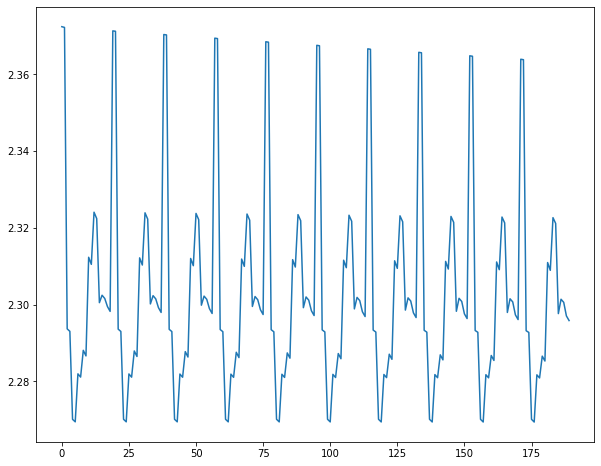

In [18]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [ ]:
test = torch.FloatTensor(test_dataNp.tolist())
test_var = Variable(test)

net_out = net(test_var)

print(torch.max(net_out.data, 1)[1].numpy())